In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
test = pd.read_csv("cancer_us_county-testing.csv")
train = pd.read_csv("cancer_us_county-training.csv")

In [3]:
train.shape

(2438, 35)

In [4]:
test.shape

(609, 35)

In [5]:
df = pd.concat([test, train])
df = df.sort_values(by="Id")

In [6]:
#Shape
df.shape
#Check for duplicates
df = df.drop_duplicates()
df.shape

(3047, 35)

In [7]:
df.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'binnedInc',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'Geography',
       'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24',
       'PctSomeCol18_24', 'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate', 'Id'],
      dtype='object')

In [8]:
#Initially arrange the target variable
df = df[['Id','avgAnnCount', 'avgDeathsPerYear', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'binnedInc',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'Geography',
       'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24',
       'PctSomeCol18_24', 'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate','TARGET_deathRate']]

In [9]:
df.head()

,Id,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
0,0,88.000000,40,561.400000,29090,13352,26.8,2771.120431,"[22640, 34218.1]",39.8,...,32.0,47.5,32.9,99.693045,0.044920,0.000000,0.000000,55.499459,6.838710,261.0
1,1,73.000000,35,345.600000,29782,21903,38.8,0.000000,"[22640, 34218.1]",32.3,...,18.8,45.3,34.1,94.791383,1.649850,0.063631,2.854286,52.818296,4.799131,167.3
2,2,292.000000,124,468.400000,41955,48985,15.5,0.000000,"(40362.7, 42724.4]",42.2,...,44.9,34.5,16.0,95.102348,1.741749,0.376429,0.445611,50.560800,3.996826,191.0
3,3,1962.667684,7,453.549422,55378,3007,11.1,0.000000,"(54545.6, 61494.5]",41.6,...,49.6,30.1,15.2,85.833870,0.933677,0.160979,7.244044,52.565181,3.291536,165.4
4,4,43.000000,20,349.700000,26309,8551,35.3,0.000000,"[22640, 34218.1]",43.9,...,30.4,45.1,24.5,24.535525,73.223736,0.394100,1.396239,33.641208,3.166561,160.6


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3047 entries, 0 to 2437
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       3047 non-null   int64  
 1   avgAnnCount              3047 non-null   float64
 2   avgDeathsPerYear         3047 non-null   int64  
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [11]:
df.isna().sum()

Id                            0
avgAnnCount                   0
avgDeathsPerYear              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

In [12]:
df.drop(["PctSomeCol18_24", "PctPrivateCoverageAlone"], axis=1, inplace=True)

In [13]:
df.isna().sum()

Id                          0
avgAnnCount                 0
avgDeathsPerYear            0
incidenceRate               0
medIncome                   0
popEst2015                  0
povertyPercent              0
studyPerCap                 0
binnedInc                   0
MedianAge                   0
MedianAgeMale               0
MedianAgeFemale             0
Geography                   0
AvgHouseholdSize            0
PercentMarried              0
PctNoHS18_24                0
PctHS18_24                  0
PctBachDeg18_24             0
PctHS25_Over                0
PctBachDeg25_Over           0
PctEmployed16_Over        152
PctUnemployed16_Over        0
PctPrivateCoverage          0
PctEmpPrivCoverage          0
PctPublicCoverage           0
PctPublicCoverageAlone      0
PctWhite                    0
PctBlack                    0
PctAsian                    0
PctOtherRace                0
PctMarriedHouseholds        0
BirthRate                   0
TARGET_deathRate            0
dtype: int

In [14]:
df.drop("Geography", axis=1, inplace = True)

In [15]:
df.shape

(3047, 32)

In [16]:
df.head()

,Id,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
0,0,88.000000,40,561.400000,29090,13352,26.8,2771.120431,"[22640, 34218.1]",39.8,...,32.0,47.5,32.9,99.693045,0.044920,0.000000,0.000000,55.499459,6.838710,261.0
1,1,73.000000,35,345.600000,29782,21903,38.8,0.000000,"[22640, 34218.1]",32.3,...,18.8,45.3,34.1,94.791383,1.649850,0.063631,2.854286,52.818296,4.799131,167.3
2,2,292.000000,124,468.400000,41955,48985,15.5,0.000000,"(40362.7, 42724.4]",42.2,...,44.9,34.5,16.0,95.102348,1.741749,0.376429,0.445611,50.560800,3.996826,191.0
3,3,1962.667684,7,453.549422,55378,3007,11.1,0.000000,"(54545.6, 61494.5]",41.6,...,49.6,30.1,15.2,85.833870,0.933677,0.160979,7.244044,52.565181,3.291536,165.4
4,4,43.000000,20,349.700000,26309,8551,35.3,0.000000,"[22640, 34218.1]",43.9,...,30.4,45.1,24.5,24.535525,73.223736,0.394100,1.396239,33.641208,3.166561,160.6


In [17]:
df.columns

Index(['Id', 'avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome',
       'popEst2015', 'povertyPercent', 'studyPerCap', 'binnedInc', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over',
       'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate',
       'TARGET_deathRate'],
      dtype='object')

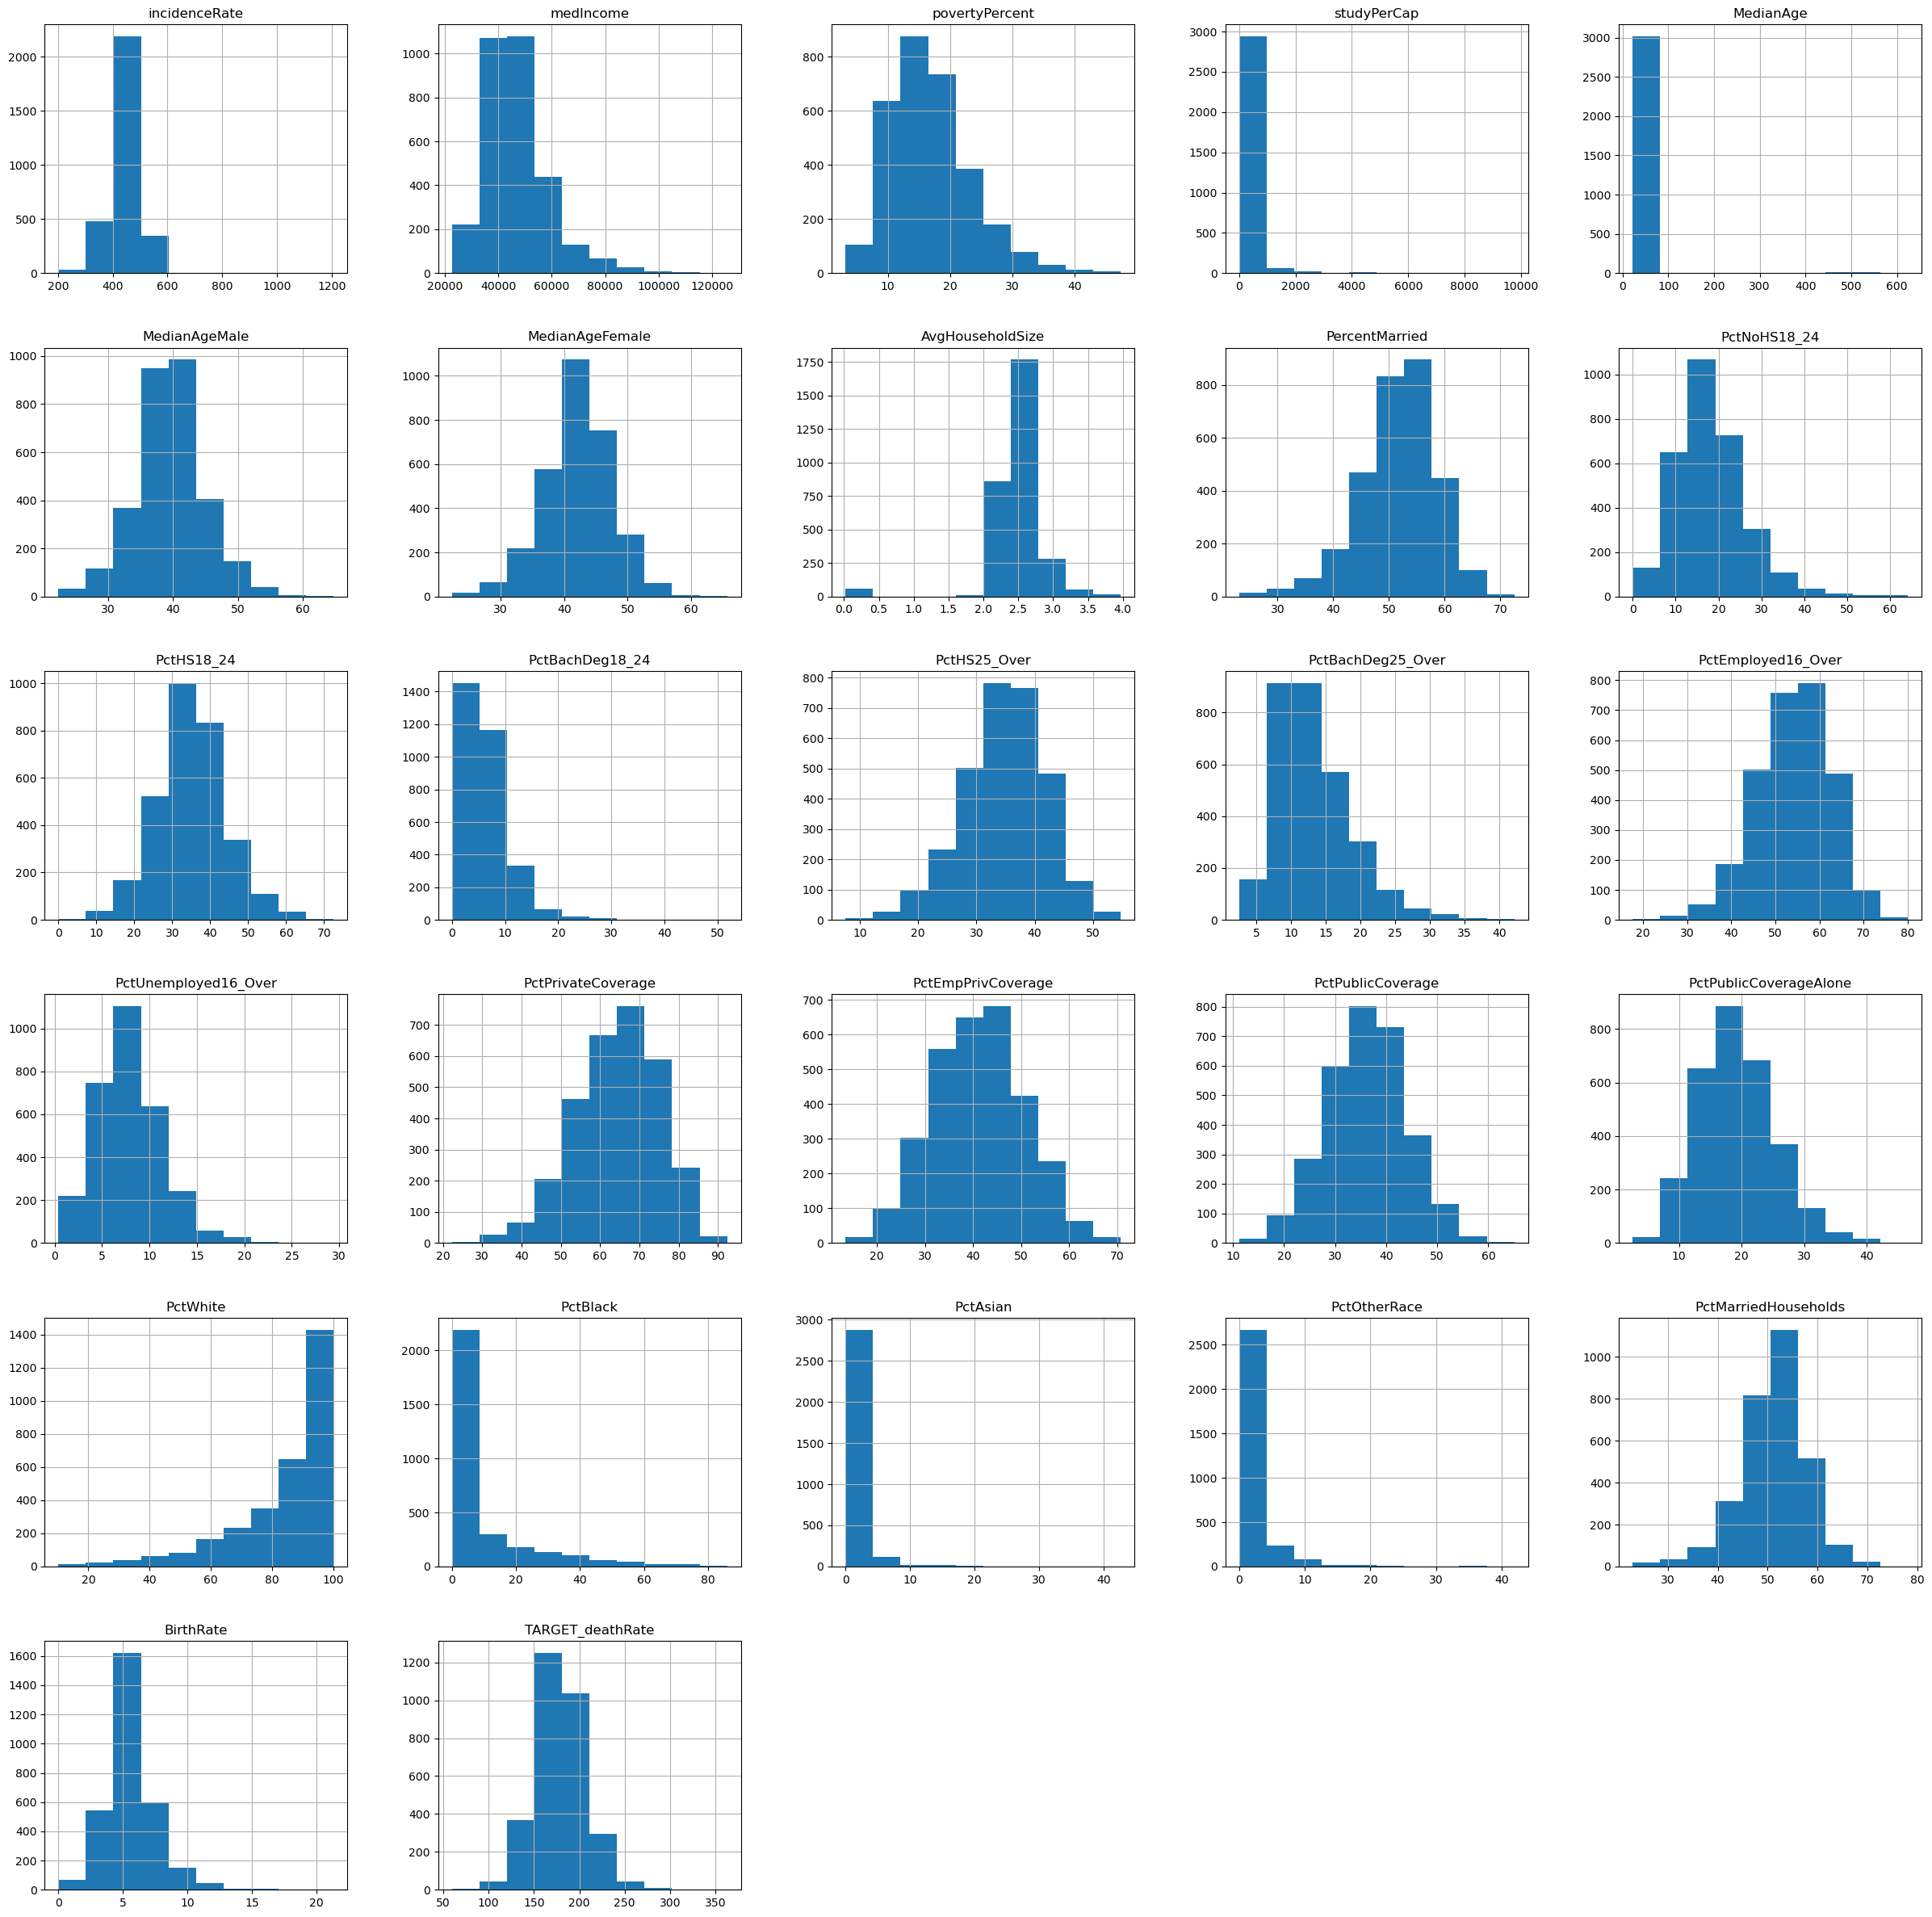

In [18]:
%matplotlib inline
histo = df.hist(['incidenceRate',
       'medIncome','povertyPercent', 'studyPerCap',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale',
       'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24',
       'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctEmpPrivCoverage','PctPublicCoverage',
       'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate','TARGET_deathRate'], figsize=(30,30))

In [19]:
def ConVSCon(inpData, Cols, Target):
    fig,subplot = plt.subplots(nrows = len(Cols), ncols = 1, figsize = (5,80))
    for ColName, PlotNumber in zip(Cols, range(len(Cols))):
        inpData.plot.scatter(x = ColName, y = Target, ax = subplot[PlotNumber])

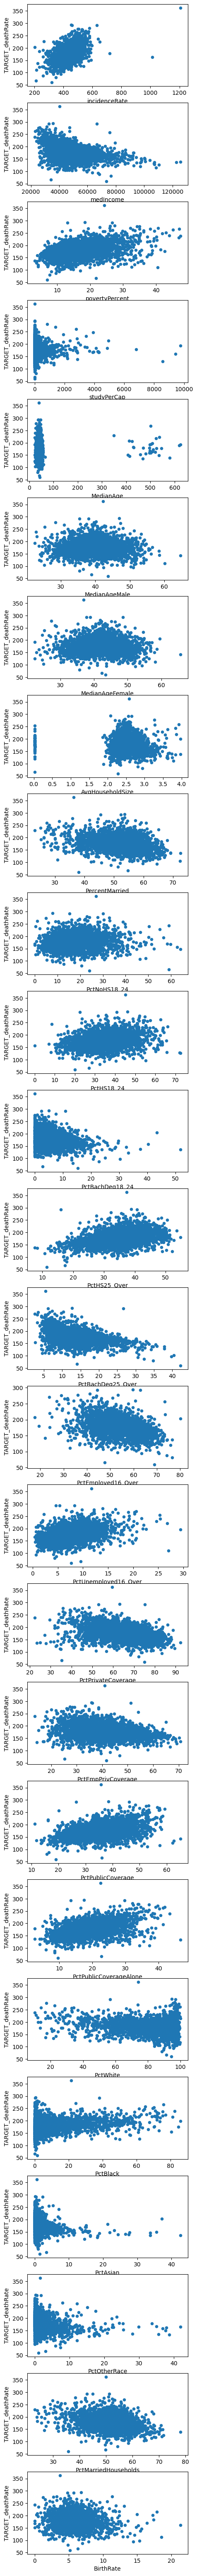

In [20]:
ConVSCon(inpData=df, Cols=['incidenceRate',
       'medIncome','povertyPercent', 'studyPerCap',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale',
       'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24',
       'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctEmpPrivCoverage','PctPublicCoverage',
       'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate'], Target = 'TARGET_deathRate')

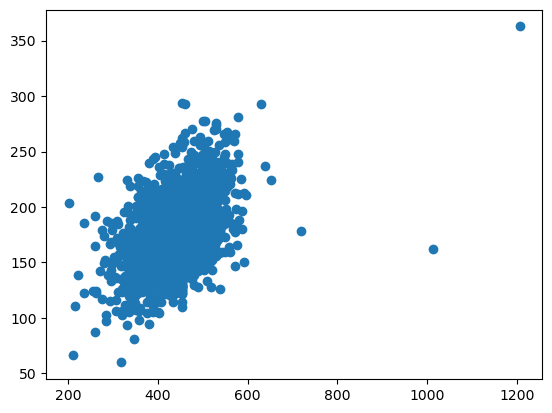

In [21]:
plt.scatter(x=df['incidenceRate'], y=df['TARGET_deathRate'])

<AxesSubplot:>

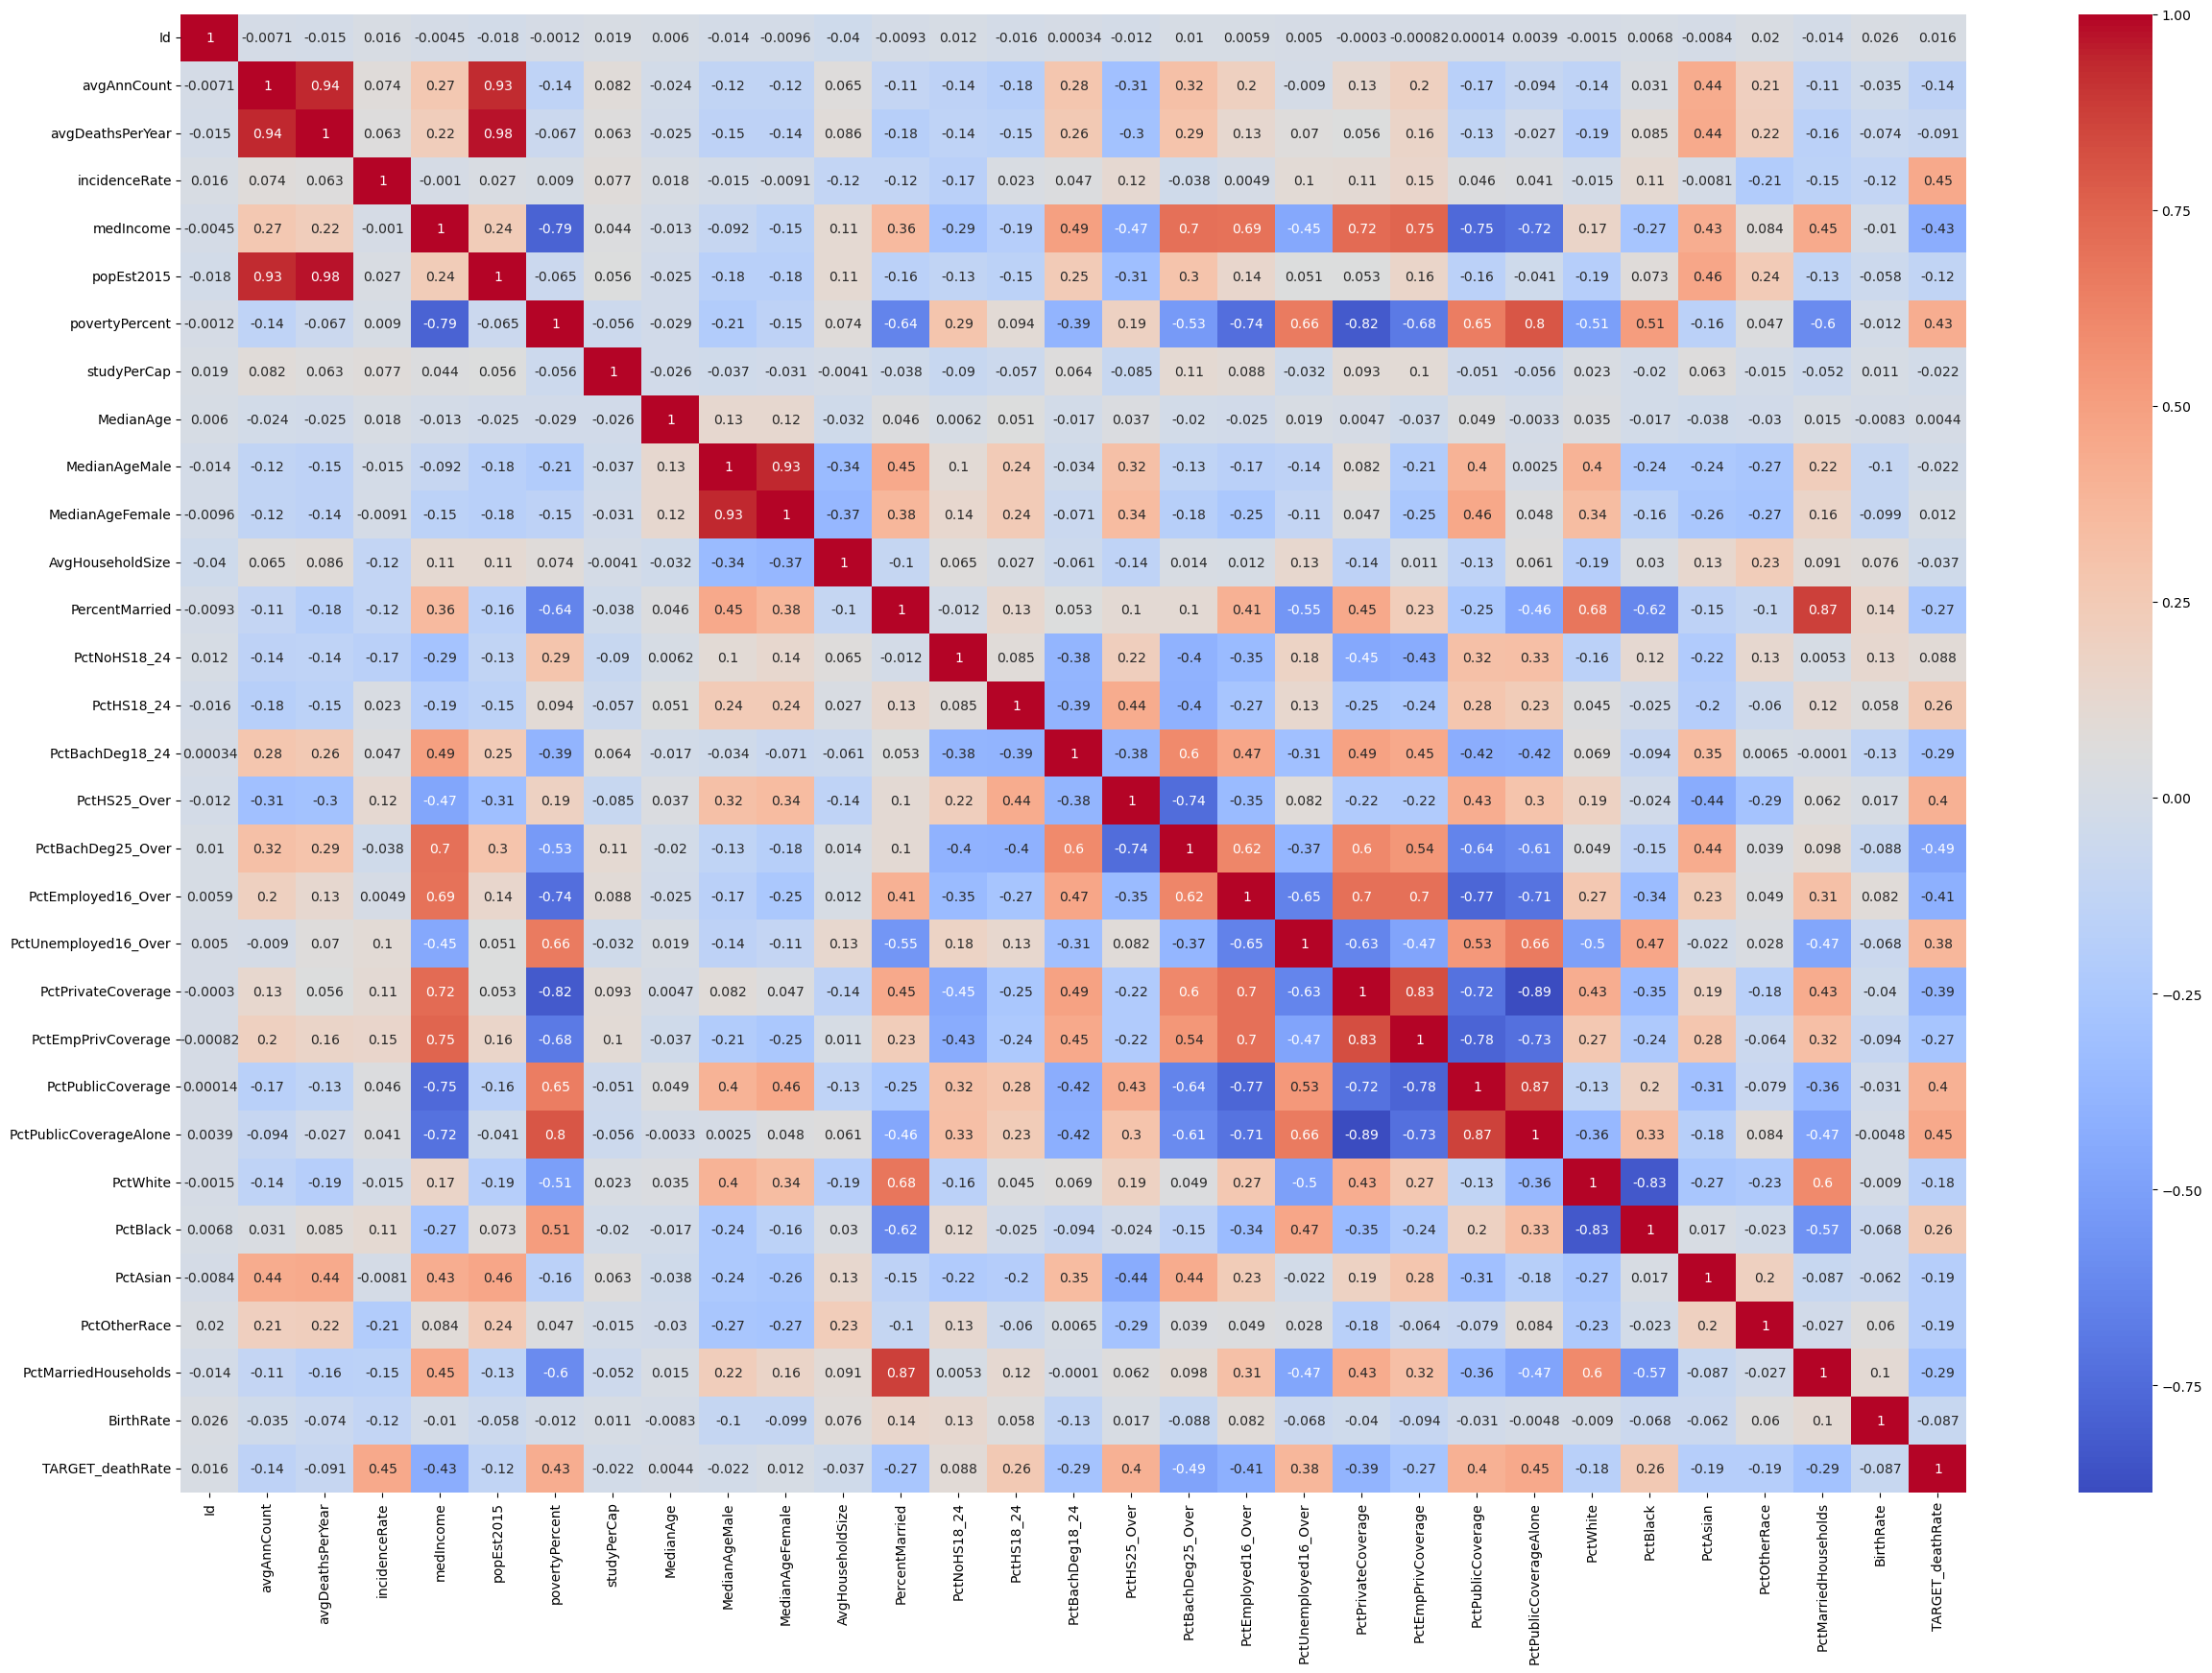

In [22]:
corr = df.corr()
plt.figure(figsize=(30,20))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [23]:
np.abs(corr['TARGET_deathRate']).sort_values(ascending=False)

TARGET_deathRate          1.000000
PctBachDeg25_Over         0.485477
incidenceRate             0.449432
PctPublicCoverageAlone    0.449358
povertyPercent            0.429389
medIncome                 0.428615
PctEmployed16_Over        0.412046
PctHS25_Over              0.404589
PctPublicCoverage         0.404572
PctPrivateCoverage        0.386066
PctUnemployed16_Over      0.378412
PctMarriedHouseholds      0.293325
PctBachDeg18_24           0.287817
PctEmpPrivCoverage        0.267399
PercentMarried            0.266820
PctHS18_24                0.261976
PctBlack                  0.257024
PctOtherRace              0.189894
PctAsian                  0.186331
PctWhite                  0.177400
avgAnnCount               0.143532
popEst2015                0.120073
avgDeathsPerYear          0.090715
PctNoHS18_24              0.088463
BirthRate                 0.087407
AvgHouseholdSize          0.036905
studyPerCap               0.022285
MedianAgeMale             0.021929
Id                  

In [24]:
df.nunique()

Id                        3047
avgAnnCount                929
avgDeathsPerYear           608
incidenceRate             1506
medIncome                 2920
popEst2015                2999
povertyPercent             333
studyPerCap               1117
binnedInc                   10
MedianAge                  325
MedianAgeMale              298
MedianAgeFemale            296
AvgHouseholdSize           199
PercentMarried             362
PctNoHS18_24               405
PctHS18_24                 469
PctBachDeg18_24            219
PctHS25_Over               361
PctBachDeg25_Over          281
PctEmployed16_Over         409
PctUnemployed16_Over       195
PctPrivateCoverage         498
PctEmpPrivCoverage         450
PctPublicCoverage          395
PctPublicCoverageAlone     319
PctWhite                  3044
PctBlack                  2972
PctAsian                  2852
PctOtherRace              2903
PctMarriedHouseholds      3043
BirthRate                 3019
TARGET_deathRate          1053
dtype: i

In [25]:
binnedInc_values = df['binnedInc'].unique()
print(binnedInc_values)

['[22640, 34218.1]' '(40362.7, 42724.4]' '(54545.6, 61494.5]'
 '(61494.5, 125635]' '(34218.1, 37413.8]' '(48021.6, 51046.4]'
 '(42724.4, 45201]' '(45201, 48021.6]' '(51046.4, 54545.6]'
 '(37413.8, 40362.7]']


In [26]:
map_bin = {'[22640, 34218.1]':1, '(40362.7, 42724.4]':4, '(54545.6, 61494.5]':9,
 '(61494.5, 125635]':10, '(34218.1, 37413.8]':2, '(48021.6, 51046.4]':7,
 '(42724.4, 45201]':5, '(45201, 48021.6]':6, '(51046.4, 54545.6]':8 ,
 '(37413.8, 40362.7]':1}

In [27]:
df['binnedInc'] = df['binnedInc'].map(map_bin)

In [28]:
df.head()

,Id,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
0,0,88.000000,40,561.400000,29090,13352,26.8,2771.120431,1,39.8,...,32.0,47.5,32.9,99.693045,0.044920,0.000000,0.000000,55.499459,6.838710,261.0
1,1,73.000000,35,345.600000,29782,21903,38.8,0.000000,1,32.3,...,18.8,45.3,34.1,94.791383,1.649850,0.063631,2.854286,52.818296,4.799131,167.3
2,2,292.000000,124,468.400000,41955,48985,15.5,0.000000,4,42.2,...,44.9,34.5,16.0,95.102348,1.741749,0.376429,0.445611,50.560800,3.996826,191.0
3,3,1962.667684,7,453.549422,55378,3007,11.1,0.000000,9,41.6,...,49.6,30.1,15.2,85.833870,0.933677,0.160979,7.244044,52.565181,3.291536,165.4
4,4,43.000000,20,349.700000,26309,8551,35.3,0.000000,1,43.9,...,30.4,45.1,24.5,24.535525,73.223736,0.394100,1.396239,33.641208,3.166561,160.6


In [29]:
df['binnedInc'].unique()

array([ 1,  4,  9, 10,  2,  7,  5,  6,  8], dtype=int64)

In [30]:
df.isna().sum()

Id                          0
avgAnnCount                 0
avgDeathsPerYear            0
incidenceRate               0
medIncome                   0
popEst2015                  0
povertyPercent              0
studyPerCap                 0
binnedInc                   0
MedianAge                   0
MedianAgeMale               0
MedianAgeFemale             0
AvgHouseholdSize            0
PercentMarried              0
PctNoHS18_24                0
PctHS18_24                  0
PctBachDeg18_24             0
PctHS25_Over                0
PctBachDeg25_Over           0
PctEmployed16_Over        152
PctUnemployed16_Over        0
PctPrivateCoverage          0
PctEmpPrivCoverage          0
PctPublicCoverage           0
PctPublicCoverageAlone      0
PctWhite                    0
PctBlack                    0
PctAsian                    0
PctOtherRace                0
PctMarriedHouseholds        0
BirthRate                   0
TARGET_deathRate            0
dtype: int64

In [31]:
mean_value = df['PctEmployed16_Over'].mean()
df['PctEmployed16_Over'].fillna(mean_value, inplace=True)
print(df['PctEmployed16_Over'])

0       37.3
1       31.7
2       48.5
3       57.1
4       28.6
        ... 
2434    52.3
2435    46.5
272     36.1
2436    56.2
2437    51.4
Name: PctEmployed16_Over, Length: 3047, dtype: float64


In [32]:
df['PctEmployed16_Over'].isna().sum()

0

In [42]:
Predictor = ['incidenceRate','PctPublicCoverageAlone','PctBachDeg25_Over','povertyPercent']
Target = ['TARGET_deathRate']
X = df[Predictor].values
y = df[Target].values

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [44]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2437, 4)
(2437, 1)
(610, 4)
(610, 1)


In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lrRegModel = lr.fit(X_train, y_train)
lrPrediction = lrRegModel.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error
#print('R2 value', r2_score(y_train, lrRegModel.predict(X_train)))

print('MSE',mean_squared_error(lrPrediction,y_test))

testData = pd.DataFrame(X_test, columns=Predictor)
testData['Target'] = y_test
testData['PredictedValue'] = lrPrediction
#TestData['APE'] = (np.abs(y_test-lrPrediction)/y_test)*100

print('Accuracy', 100-(np.mean((np.abs(y_test-lrPrediction)/y_test))*100))

TestData.head()

MSE 473.795844936097
Accuracy 90.7276408085799


,incidenceRate,PctPublicCoverageAlone,PctBachDeg25_Over,povertyPercent,Target,PredictedValue
0,449.500000,14.5,13.0,13.4,174.5,174.212720
1,473.300000,21.3,16.2,18.3,173.6,181.615406
2,420.300000,16.7,16.2,9.8,177.5,160.869839
3,356.100000,17.8,17.2,16.0,169.9,150.363861
4,453.549422,15.1,12.2,11.3,176.5,175.066231
